In [10]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime, timezone, timedelta

In [11]:
# Constants
SENSEBOX_ID = "6793f4e4c326f20007c34dd2"  # The ID of the SenseBox
API_URL_FORMAT_BOX = "https://api.opensensemap.org/boxes/{sensebox_id}?format={response_format}"
API_URL_FORMAT_SENSOR = "https://api.opensensemap.org/boxes/{sensebox_id}/data/{sensor_id}?from-date={fromDate}&to-date={toDate}&download=true&format=json"

# Function to create and return a dictionary {sensor name : sensor id}
def get_sensor_names_ids():
    # Construct the URL for the API request using the SenseBox ID and JSON format
    url = API_URL_FORMAT_BOX.format(sensebox_id=SENSEBOX_ID,response_format="json")

    # Ensure the API request is successful by checking the status code
    status_code = requests.get(url).status_code
    assert status_code, f"Failed fetching data from API. Status code: {status_code}"

    # Get the 'sensors' list from the JSON response
    sensors = requests.get(url).json().get("sensors")

    # Create a dictionary to hold sensor names and their corresponding IDs
    sensor_name_id = {}
    for sensor in sensors:
        # Format the sensor name: remove spaces and replace special characters
        name = sensor.get('title').replace(" ", "").replace(".", "_").replace("-", "_")
        _id = sensor.get('_id')  # Get the sensor ID
        sensor_name_id.update({name: _id})  # Add entry to the dictionary

    # Return the dictionary of sensor names and IDs
    return sensor_name_id

### So kann man die namen und ids als eine Liste haben

In [12]:
get_sensor_names_ids()

{'Temperatur': '6793f4e4c326f20007c34dd3',
 'rel_Luftfeuchte': '6793f4e4c326f20007c34dd4',
 'Beleuchtungsstärke': '6793f4e4c326f20007c34dd5',
 'UV_Intensität': '6793f4e4c326f20007c34dd6',
 'PM1': '6793f4e4c326f20007c34dd7',
 'PM2_5': '6793f4e4c326f20007c34dd8',
 'PM4': '6793f4e4c326f20007c34dd9',
 'PM10': '6793f4e4c326f20007c34dda'}

### Dict Ausgabe von der Funktion

In [13]:
get_sensor_names_ids()

{'Temperatur': '6793f4e4c326f20007c34dd3',
 'rel_Luftfeuchte': '6793f4e4c326f20007c34dd4',
 'Beleuchtungsstärke': '6793f4e4c326f20007c34dd5',
 'UV_Intensität': '6793f4e4c326f20007c34dd6',
 'PM1': '6793f4e4c326f20007c34dd7',
 'PM2_5': '6793f4e4c326f20007c34dd8',
 'PM4': '6793f4e4c326f20007c34dd9',
 'PM10': '6793f4e4c326f20007c34dda'}

### So kann man auf die einzelne Namen zugreifen

In [14]:
sensor_id = get_sensor_names_ids()["Temperatur"]
sensor_id

'6793f4e4c326f20007c34dd3'

In [15]:
from datetime import datetime, timezone, timedelta
def get_data(sensor_id:str,fromDate,toDate):

    #get URL with sensor_id and dates
    url = API_URL_FORMAT_SENSOR.format(sensebox_id=SENSEBOX_ID, sensor_id=sensor_id, fromDate=fromDate, toDate=toDate)
    
    #Make sure we get correct response
    status_code = requests.get(url).status_code
    assert status_code == 200, f"Failed fetching data from api {status_code}"
    
    #Get the json file of the sensor
    data = requests.get(url).json()
    data = [{'createdAt': item['createdAt'], 'value': item['value']} for item in data]
    return data


In [8]:
now = datetime.now(timezone.utc)
iso_now = now.isoformat().replace('+00:00','Z')

two_weeeks_ago = datetime.now(timezone.utc) - timedelta(weeks=3) 
iso_two_weeks_ago = two_weeeks_ago.isoformat().replace('+00:00','Z')

iso_now, iso_two_weeks_ago

data = get_data(sensor_id="6793f4e4c326f20007c34dd3",fromDate=iso_two_weeks_ago,toDate=iso_now)
data

[{'createdAt': '2025-06-28T17:55:14.139Z', 'value': '30.78'},
 {'createdAt': '2025-06-28T17:54:13.985Z', 'value': '30.86'},
 {'createdAt': '2025-06-28T17:53:13.855Z', 'value': '30.83'},
 {'createdAt': '2025-06-28T17:52:13.737Z', 'value': '30.90'},
 {'createdAt': '2025-06-28T17:51:14.811Z', 'value': '31.01'},
 {'createdAt': '2025-06-28T17:50:26.030Z', 'value': '31.01'},
 {'createdAt': '2025-06-28T17:49:13.342Z', 'value': '31.05'},
 {'createdAt': '2025-06-28T17:48:22.200Z', 'value': '31.18'},
 {'createdAt': '2025-06-28T17:47:12.935Z', 'value': '31.23'},
 {'createdAt': '2025-06-28T17:46:12.769Z', 'value': '31.34'},
 {'createdAt': '2025-06-28T17:45:14.471Z', 'value': '31.37'},
 {'createdAt': '2025-06-28T17:44:12.452Z', 'value': '31.49'},
 {'createdAt': '2025-06-28T17:43:12.451Z', 'value': '31.60'},
 {'createdAt': '2025-06-28T17:42:12.101Z', 'value': '31.75'},
 {'createdAt': '2025-06-28T17:41:13.103Z', 'value': '31.79'},
 {'createdAt': '2025-06-28T17:40:24.086Z', 'value': '32.02'},
 {'creat

### create_dataframe function mit inputs sensor_id und from- und toDate die einen default Wert haben

In [9]:
def create_dataframe(sensor_id, fromDate="2025-04-10T00:00:00Z", toDate="2025-04-24T00:00:00Z"):
    url = API_URL_FORMAT_SENSOR.format(sensebox_id=SENSEBOX_ID, sensor_id=sensor_id, fromDate=fromDate, toDate=toDate)
    
    status_code = requests.get(url).status_code
    assert status_code == 200, f"Failed fetching data from api {status_code}"
    
    data = requests.get(url).json()
    return pd.DataFrame(data)


In [10]:
df = create_dataframe(sensor_id=get_sensor_names_ids()["Temperatur"],fromDate=iso_two_weeks_ago,toDate=iso_now)
df['createdAt'] = pd.to_datetime(df['createdAt'])
df['value'] = pd.to_numeric(df['value'])
df

location                        createdAt  value
0     [-48.480915, -1.299151] 2025-06-28 17:55:14.139000+00:00  30.78
1     [-48.480915, -1.299151] 2025-06-28 17:54:13.985000+00:00  30.86
2     [-48.480915, -1.299151] 2025-06-28 17:53:13.855000+00:00  30.83
3     [-48.480915, -1.299151] 2025-06-28 17:52:13.737000+00:00  30.90
4     [-48.480915, -1.299151] 2025-06-28 17:51:14.811000+00:00  31.01
...                       ...                              ...    ...
9995  [-48.480915, -1.299151] 2025-06-21 16:58:48.963000+00:00  32.44
9996  [-48.480915, -1.299151] 2025-06-21 16:57:48.749000+00:00  32.47
9997  [-48.480915, -1.299151] 2025-06-21 16:56:48.534000+00:00  32.71
9998  [-48.480915, -1.299151] 2025-06-21 16:55:48.347000+00:00  32.58
9999  [-48.480915, -1.299151] 2025-06-21 16:54:48.169000+00:00  32.65

[10000 rows x 3 columns]

In [11]:
df

location                        createdAt  value
0     [-48.480915, -1.299151] 2025-06-28 17:55:14.139000+00:00  30.78
1     [-48.480915, -1.299151] 2025-06-28 17:54:13.985000+00:00  30.86
2     [-48.480915, -1.299151] 2025-06-28 17:53:13.855000+00:00  30.83
3     [-48.480915, -1.299151] 2025-06-28 17:52:13.737000+00:00  30.90
4     [-48.480915, -1.299151] 2025-06-28 17:51:14.811000+00:00  31.01
...                       ...                              ...    ...
9995  [-48.480915, -1.299151] 2025-06-21 16:58:48.963000+00:00  32.44
9996  [-48.480915, -1.299151] 2025-06-21 16:57:48.749000+00:00  32.47
9997  [-48.480915, -1.299151] 2025-06-21 16:56:48.534000+00:00  32.71
9998  [-48.480915, -1.299151] 2025-06-21 16:55:48.347000+00:00  32.58
9999  [-48.480915, -1.299151] 2025-06-21 16:54:48.169000+00:00  32.65

[10000 rows x 3 columns]

# DATABANK CONNECTION

In [7]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(
    host="localhost",      
    port=5432,
    dbname="dash_db",
    user="dashuser",
    password="dashpassword"
)

query = "SELECT * FROM public.temperatur ORDER BY createdat;"
df = pd.read_sql(query, conn)

df

C:\Users\bnjmn\AppData\Local\Temp\ipykernel_10832\470314160.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Empty DataFrame
Columns: [createdat, value]
Index: []

In [54]:
from app import bulk_insert_into_table, create_table


sensor_dict = get_sensor_names_ids()
#Get Time
now = datetime.now(timezone.utc) 
two_weeeks_ago = now - timedelta(weeks=2) 
iso_now = now.isoformat().replace('+00:00','Z')
iso_two_weeks_ago = two_weeeks_ago.isoformat().replace('+00:00','Z')

    #Data initalization
for name, id in sensor_dict.items():
    #Create Tables
    create_table(name)

    #Get Data for Tabel
    data = get_data(sensor_id=id,
                fromDate=iso_two_weeks_ago,
                toDate=iso_now)
    #Insert Data into table
    bulk_insert_into_table(table_name=name,
                            data=data)

create_table(table_name='Temperatur')

id = sensor_dict['Temperatur']
data = []
for iteration in range(5):
    print(f"From: {iso_two_weeks_ago} To: {iso_now}")
    
    new_data = get_data(sensor_id=id, fromDate=iso_two_weeks_ago, toDate=iso_now)
    data.extend(new_data)

    # Extract and parse latest time as datetime object
    last_time_str = new_data[-1]['createdAt'].replace('+00:00', 'Z')
    last_time = datetime.strptime(last_time_str, "%Y-%m-%dT%H:%M:%S.%fZ").replace(tzinfo=timezone.utc)
    
    print(f'{last_time.isoformat()}')

    # Update range for next loop
    iso_now = last_time.isoformat().replace('+00:00', 'Z')
    iso_two_weeks_ago = (last_time - timedelta(weeks=2, seconds=10)).isoformat().replace('+00:00', 'Z')
    print(f"*UPDATED* From: {iso_two_weeks_ago} To: {iso_now}")
    
bulk_insert_into_table('Temperatur',data=data)

Hypertable temperatur created
10000 rows inserted into Temperatur.
Hypertable rel_luftfeuchte created
10000 rows inserted into rel_Luftfeuchte.
Hypertable beleuchtungsstärke created
10000 rows inserted into Beleuchtungsstärke.
Hypertable uv_intensität created
10000 rows inserted into UV_Intensität.
Hypertable pm1 created
10000 rows inserted into PM1.
Hypertable pm2_5 created
10000 rows inserted into PM2_5.
Hypertable pm4 created
10000 rows inserted into PM4.
Hypertable pm10 created
10000 rows inserted into PM10.
Hypertable temperatur created
From: 2025-06-14T18:55:53.943549Z To: 2025-06-28T18:55:53.943549Z
2025-06-21T17:54:57.497000+00:00
*UPDATED* From: 2025-06-07T17:54:47.497000Z To: 2025-06-21T17:54:57.497000Z
From: 2025-06-07T17:54:47.497000Z To: 2025-06-21T17:54:57.497000Z
2025-06-14T15:18:20.082000+00:00
*UPDATED* From: 2025-05-31T15:18:10.082000Z To: 2025-06-14T15:18:20.082000Z
From: 2025-05-31T15:18:10.082000Z To: 2025-06-14T15:18:20.082000Z
2025-06-07T08:57:33.016000+00:00
*UP

In [ ]:
def regular_timestamp(data):
    # Step 1: Convert to DataFrame
    df = pd.DataFrame(data)

    # Step 2: Parse time and values
    df['createdAt'] = pd.to_datetime(df['createdAt'], utc=True)
    df['value'] = df['value'].astype(float)

    # Step 3: Set timestamp as index
    df = df.set_index('createdAt')

    # Step 4: Sort index (timestamps)
    df = df.sort_index()

    # Step 5: Resample to regular 1-minute intervals
    df_regular = df.resample('1T').mean()

    # Step 6: Fill missing values if any (choose method)
    df_regular = df_regular.interpolate()  # Linear interpolation
    # df_regular = df_regular.ffill()      # Or use forward fill

    
    return df_regular  #Returns DataFrame

C:\Users\bnjmn\AppData\Local\Temp\ipykernel_16680\1771768032.py:16: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



value
createdAt                       
2025-05-24 07:11:00+00:00  25.86
2025-05-24 07:12:00+00:00  25.82
2025-05-24 07:13:00+00:00  25.81
2025-05-24 07:14:00+00:00  25.81
2025-05-24 07:15:00+00:00  25.83
...                          ...
2025-06-28 18:51:00+00:00  31.27
2025-06-28 18:52:00+00:00  31.35
2025-06-28 18:53:00+00:00  31.34
2025-06-28 18:54:00+00:00  31.31
2025-06-28 18:55:00+00:00  31.35

[51105 rows x 1 columns]

In [62]:
import matplotlib.pyplot as plt
import plotly_express as px

px.line(df_regular)



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=value<br>createdAt=%{x}<br>_value=%{y}<extra></extra>',
              'legendgroup': 'value',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'value',
              'showlegend': True,
              'type': 'scattergl',
              'x': array(['2025-05-24T07:11:00.000000000', '2025-05-24T07:12:00.000000000',
                          '2025-05-24T07:13:00.000000000', ..., '2025-06-28T18:53:00.000000000',
                          '2025-06-28T18:54:00.000000000', '2025-06-28T18:55:00.000000000'],
                         shape=(51105,), dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('XI/C9SjcOUBSuB6F69E5QI/C9Shczz' ... 'NwPQpXP0CPwvUoXE8/QJqZmZmZWT9A'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'createdAt'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': '_value'}}}
})

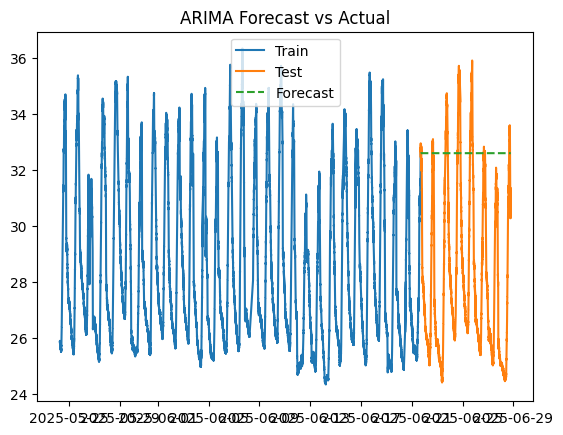

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Example: assume df_regular is your time series with datetime index and a 'value' column
df_regular = df_regular.sort_index()

train_size = int(len(df_regular) * 0.85)
train = df_regular.iloc[:train_size]
test = df_regular.iloc[train_size:]



# Daily seasonality: 1440 minutes
model = SARIMAX(train['value'],
                order=(2,1,2),           # (p,d,q)
                seasonal_order=(1,1,1,1440),  # (P,D,Q,s) -> seasonal period = 1 day = 1440 mins
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
